In [40]:
#requires tensorflow2
import tensorflow as tf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import keras
import numpy as np
from ads_utils import load_data, plot, Environment

In [59]:
INITIAL_BALANCE = 10_000
PAST_TICKS = 5
        
'''NOTE: there is no train/test split yet'''            
data = load_data([i for i in range(3,7)])

In [80]:
answers = [INITIAL_BALANCE]
actions = []
portfolio_values = [INITIAL_BALANCE]
balance = INITIAL_BALANCE
prices = []

Epoch 1/20
447/447 [==============================] - 46s 103ms/step - loss: 0.0813 - val_loss: 0.0029
Epoch 2/20
447/447 [==============================] - 47s 105ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 3/20
447/447 [==============================] - 46s 103ms/step - loss: 0.0057 - val_loss: 5.5982e-04
Epoch 4/20
447/447 [==============================] - 46s 104ms/step - loss: 0.0051 - val_loss: 3.0157e-04
Epoch 5/20
447/447 [==============================] - 48s 108ms/step - loss: 0.0046 - val_loss: 2.7673e-04
Epoch 6/20
447/447 [==============================] - 50s 112ms/step - loss: 0.0041 - val_loss: 3.0991e-04
Epoch 7/20
447/447 [==============================] - 48s 107ms/step - loss: 0.0039 - val_loss: 7.0163e-04
Epoch 8/20
447/447 [==============================] - 47s 104ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 9/20
447/447 [==============================] - 47s 106ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 10/20
447/447 [==============================] 

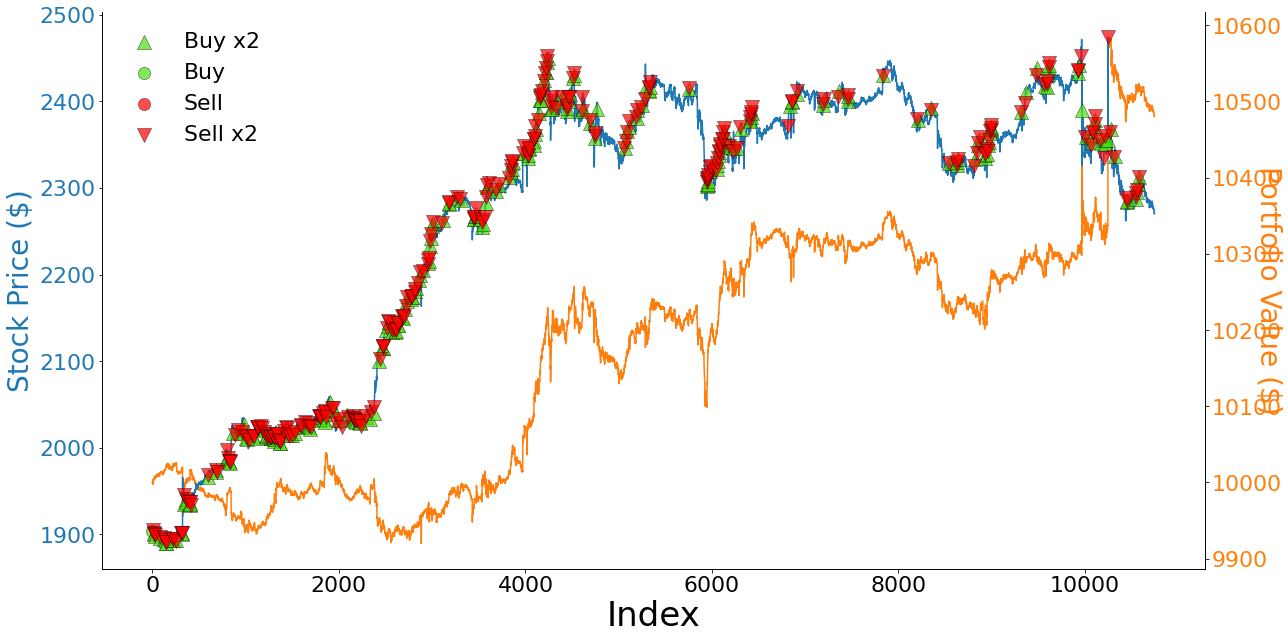

Epoch 1/20
451/451 [==============================] - 52s 114ms/step - loss: 0.0943 - val_loss: 0.0012
Epoch 2/20
451/451 [==============================] - 53s 117ms/step - loss: 0.0071 - val_loss: 4.9048e-04
Epoch 3/20
451/451 [==============================] - 56s 125ms/step - loss: 0.0059 - val_loss: 3.6253e-04
Epoch 4/20
451/451 [==============================] - 48s 106ms/step - loss: 0.0048 - val_loss: 3.5798e-04
Epoch 5/20
451/451 [==============================] - 48s 106ms/step - loss: 0.0043 - val_loss: 2.6063e-04
Epoch 6/20
451/451 [==============================] - 51s 113ms/step - loss: 0.0037 - val_loss: 2.0606e-04
Epoch 7/20
451/451 [==============================] - 48s 106ms/step - loss: 0.0034 - val_loss: 2.6854e-04
Epoch 8/20
451/451 [==============================] - 50s 110ms/step - loss: 0.0031 - val_loss: 3.1934e-04
Epoch 9/20
451/451 [==============================] - 48s 106ms/step - loss: 0.0029 - val_loss: 6.1886e-05
Epoch 10/20
451/451 [====================

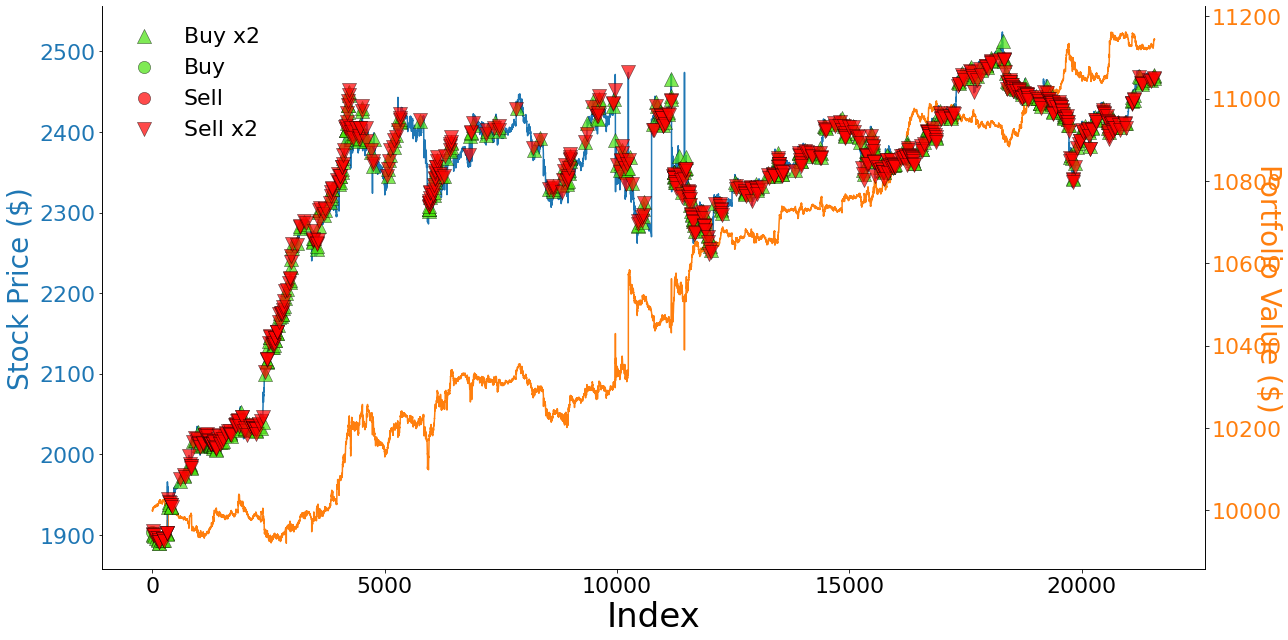

Epoch 1/20
450/450 [==============================] - 54s 120ms/step - loss: 0.0320 - val_loss: 0.0012
Epoch 2/20
450/450 [==============================] - 51s 114ms/step - loss: 0.0075 - val_loss: 3.9171e-04
Epoch 3/20
450/450 [==============================] - 51s 114ms/step - loss: 0.0060 - val_loss: 2.2718e-04
Epoch 4/20
450/450 [==============================] - 53s 118ms/step - loss: 0.0050 - val_loss: 6.6841e-05
Epoch 5/20
450/450 [==============================] - 57s 127ms/step - loss: 0.0044 - val_loss: 4.7123e-05
Epoch 6/20
450/450 [==============================] - 56s 125ms/step - loss: 0.0041 - val_loss: 4.5149e-05
Epoch 7/20
450/450 [==============================] - 55s 122ms/step - loss: 0.0039 - val_loss: 3.3332e-04
Epoch 8/20
450/450 [==============================] - 53s 119ms/step - loss: 0.0037 - val_loss: 1.9958e-04
Epoch 9/20
450/450 [==============================] - 54s 119ms/step - loss: 0.0037 - val_loss: 9.2560e-05
Epoch 10/20
450/450 [====================

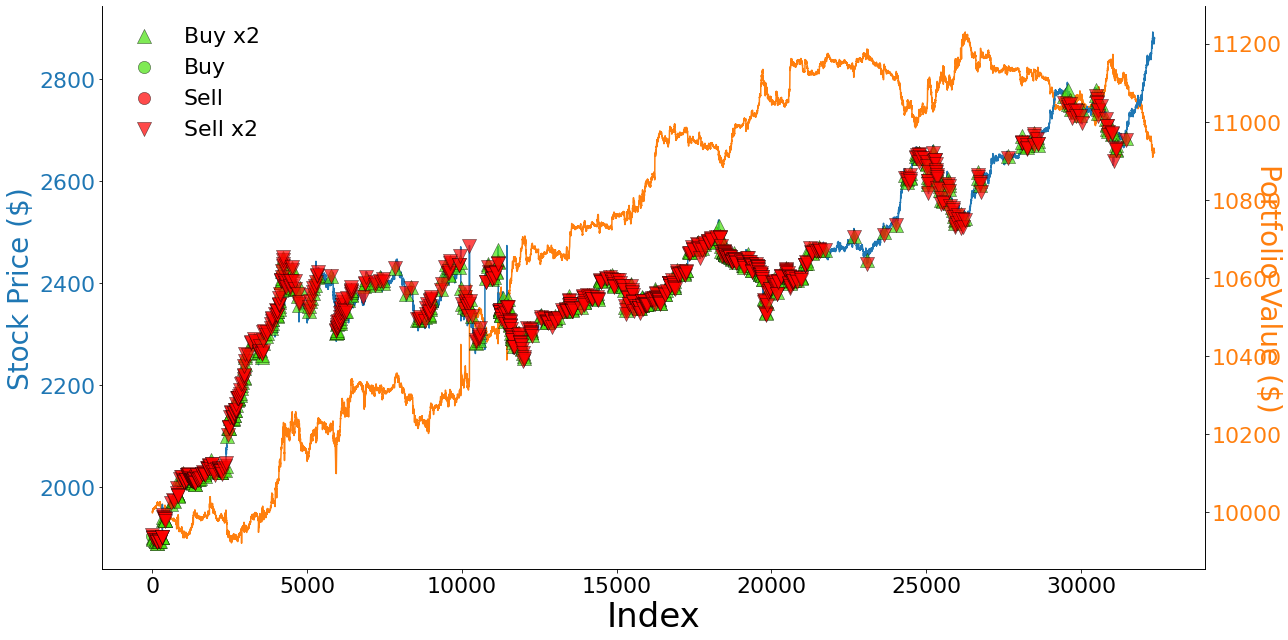

Epoch 1/20
440/440 [==============================] - 56s 127ms/step - loss: 0.0420 - val_loss: 0.0023
Epoch 2/20
440/440 [==============================] - 55s 125ms/step - loss: 0.0057 - val_loss: 9.1236e-04
Epoch 3/20
440/440 [==============================] - 52s 119ms/step - loss: 0.0045 - val_loss: 3.0950e-04
Epoch 4/20
440/440 [==============================] - 54s 123ms/step - loss: 0.0037 - val_loss: 4.7257e-04
Epoch 5/20
440/440 [==============================] - 57s 131ms/step - loss: 0.0033 - val_loss: 3.2642e-04
Epoch 6/20
440/440 [==============================] - 55s 126ms/step - loss: 0.0029 - val_loss: 1.2972e-04
Epoch 7/20
440/440 [==============================] - 56s 127ms/step - loss: 0.0028 - val_loss: 6.3608e-04
Epoch 8/20
440/440 [==============================] - 55s 124ms/step - loss: 0.0026 - val_loss: 3.4660e-04
Epoch 9/20
440/440 [==============================] - 62s 140ms/step - loss: 0.0026 - val_loss: 1.3110e-04
Epoch 10/20
440/440 [====================

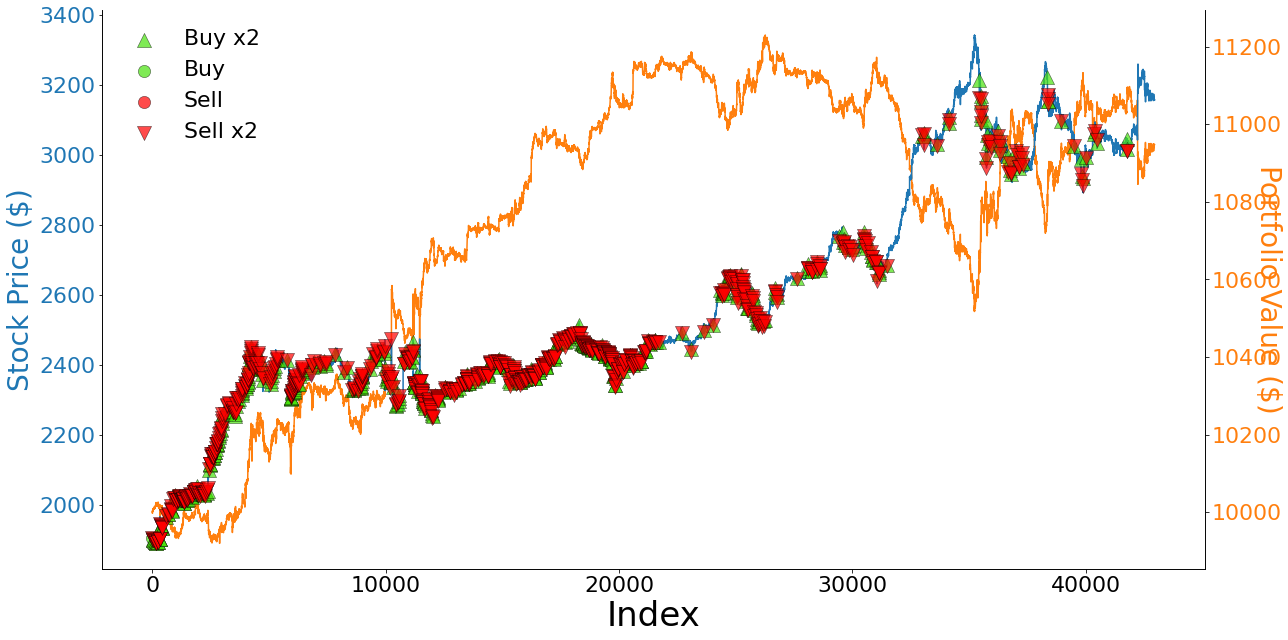

Epoch 1/20
425/425 [==============================] - 56s 132ms/step - loss: 0.0111 - val_loss: 9.1404e-04
Epoch 2/20
425/425 [==============================] - 55s 129ms/step - loss: 0.0039 - val_loss: 1.3243e-04
Epoch 3/20
425/425 [==============================] - 53s 125ms/step - loss: 0.0033 - val_loss: 8.8984e-05
Epoch 4/20
425/425 [==============================] - 54s 126ms/step - loss: 0.0029 - val_loss: 5.2494e-05
Epoch 5/20
425/425 [==============================] - 53s 125ms/step - loss: 0.0026 - val_loss: 5.6288e-05
Epoch 6/20
425/425 [==============================] - 54s 127ms/step - loss: 0.0024 - val_loss: 1.8559e-04
Epoch 7/20
425/425 [==============================] - 52s 123ms/step - loss: 0.0023 - val_loss: 1.5890e-04
Epoch 8/20
425/425 [==============================] - 53s 124ms/step - loss: 0.0022 - val_loss: 1.9914e-04
Epoch 9/20
425/425 [==============================] - 54s 128ms/step - loss: 0.0022 - val_loss: 2.4958e-04
Epoch 10/20
425/425 [================

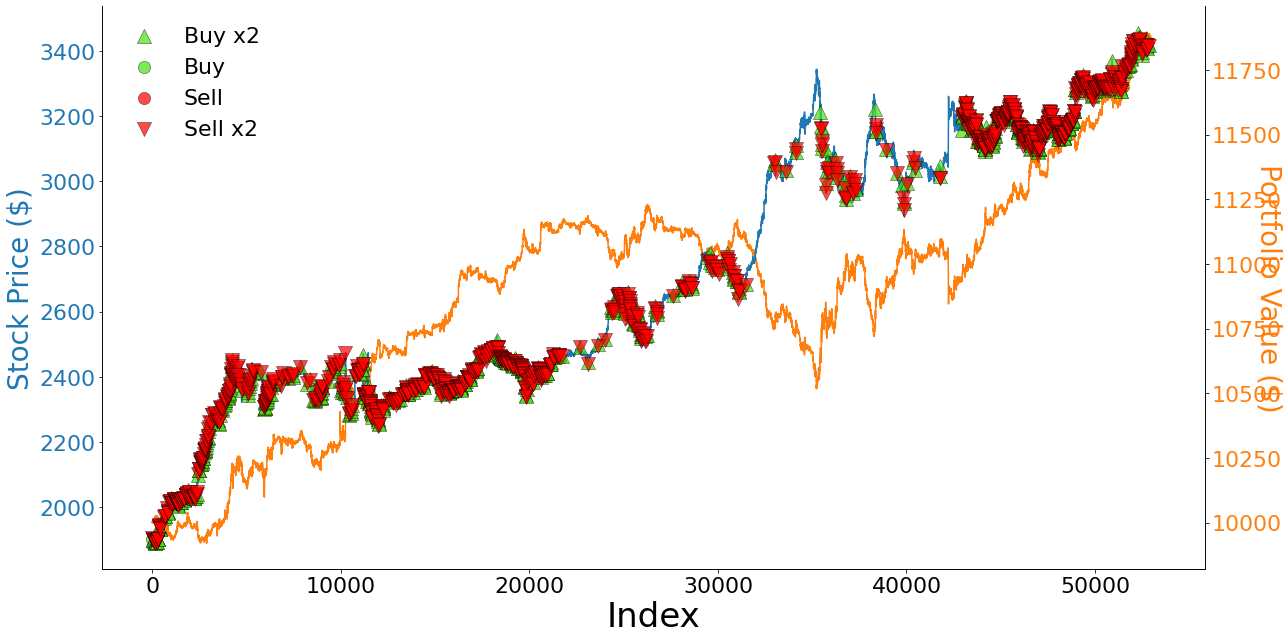

Epoch 1/20
438/438 [==============================] - 59s 134ms/step - loss: 0.0106 - val_loss: 7.2246e-04
Epoch 2/20
438/438 [==============================] - 54s 123ms/step - loss: 0.0047 - val_loss: 2.2246e-04
Epoch 3/20
438/438 [==============================] - 54s 124ms/step - loss: 0.0037 - val_loss: 1.9318e-04
Epoch 4/20
438/438 [==============================] - 54s 123ms/step - loss: 0.0032 - val_loss: 1.1423e-04
Epoch 5/20
438/438 [==============================] - 54s 122ms/step - loss: 0.0030 - val_loss: 9.4262e-05
Epoch 6/20
438/438 [==============================] - 54s 122ms/step - loss: 0.0028 - val_loss: 1.4069e-04
Epoch 7/20
438/438 [==============================] - 53s 120ms/step - loss: 0.0026 - val_loss: 9.3205e-05
Epoch 8/20
438/438 [==============================] - 56s 128ms/step - loss: 0.0026 - val_loss: 1.3798e-04
Epoch 9/20
438/438 [==============================] - 53s 122ms/step - loss: 0.0025 - val_loss: 9.7082e-05
Epoch 10/20
438/438 [================

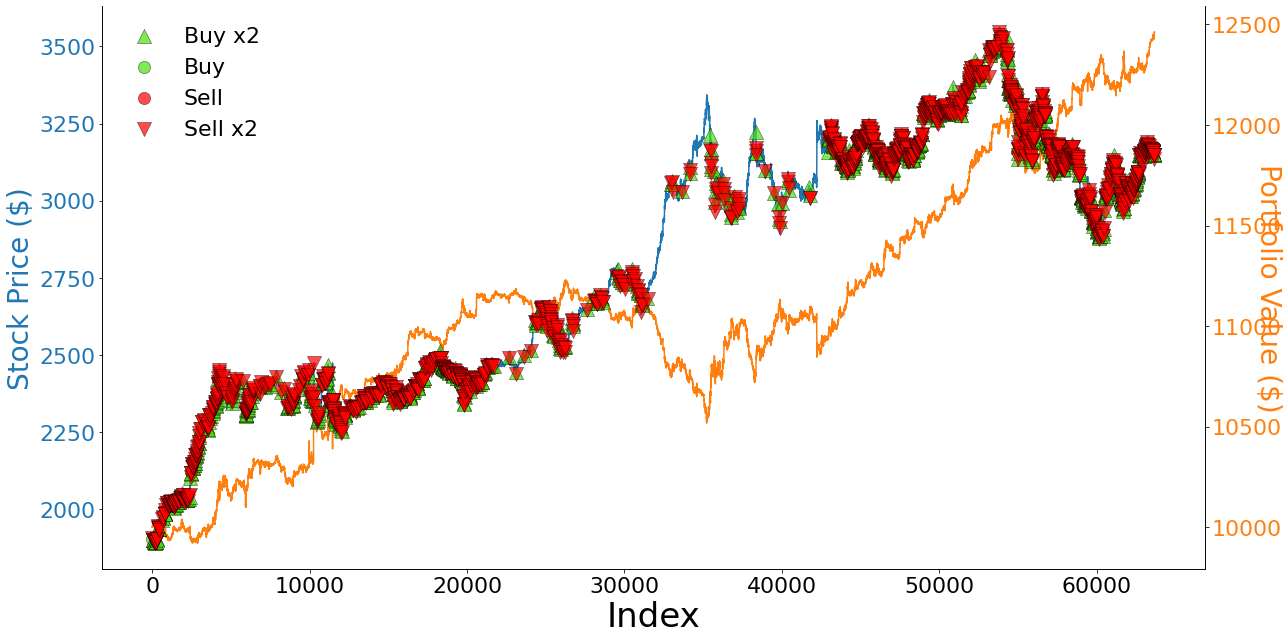

In [81]:
for i in range(6):
    data = load_data([i for i in range(6-i,6-i+4)])
    dataset = np.reshape(data['close'].values,(-1,1))
    scaled_dataset = dataset
    train= scaled_dataset[:int(scaled_dataset.shape[0]*0.75)]
    valid = scaled_dataset[int(scaled_dataset.shape[0]*0.75)-60:]
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    train2 = sc.fit_transform(train)
    valid2 = sc.transform(valid)
    x_train,y_train,x_test,y_test = [],[],[],[]
    for j in range(60,train2.shape[0]):
        x_train.append(train2[j-60:j,0])
        y_train.append(train2[j,0])
    for z in range(60,valid2.shape[0]):
        x_test.append(valid2[z-60:z,0])
        y_test.append(valid2[z,0])
    x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    from keras.models import Sequential
    from keras.layers import Dense, Dropout,LSTM
    from keras.optimizers import Adam
    model = Sequential()
    model.add(LSTM(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
    model.add(LSTM(units=100))
    model.add(Dropout(0.4))
    model.add(Dense(1))
    ADAM = Adam(0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=ADAM)
    history = model.fit(x_train,y_train,epochs=20,batch_size=72,validation_data=(x_test,y_test),verbose=1,shuffle=False)
    predicted_stock_price = sc.inverse_transform(model.predict(x_test))
    actual_stock_price = sc.inverse_transform(y_test.reshape((-1,1)))
    for j in range(len(actual_stock_price)):
        prices.append(actual_stock_price[j][0])
    for j in range(1,len(predicted_stock_price)):
        if predicted_stock_price[j]>actual_stock_price[j-1]:
            #go long
            balance += actual_stock_price[j]-actual_stock_price[j-1]
            actions.append(2)
        else:
            #go short
            balance += actual_stock_price[j-1]-actual_stock_price[j]
            actions.append(0)
        portfolio_values.append(float(balance))
    plot(prices=prices,target_positions = actions,portfolio_values = portfolio_values)

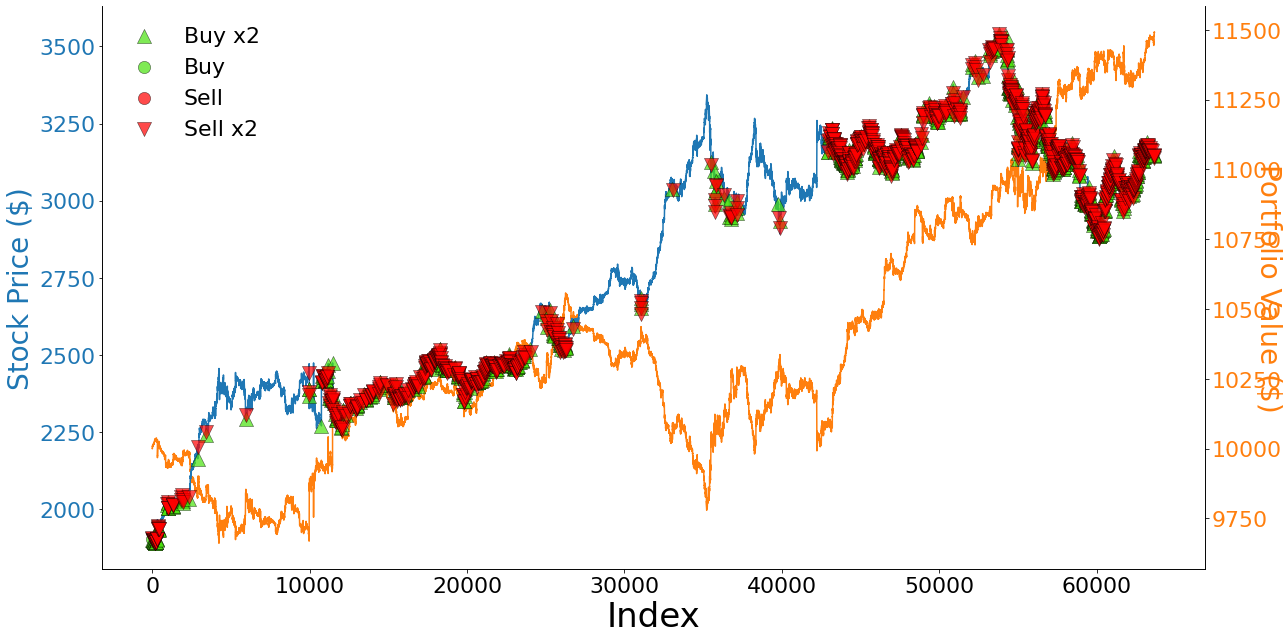

In [79]:
plot(prices=prices,target_positions = actions,portfolio_values = portfolio_values)

In [43]:
dataset = np.reshape(data['close'].values,(-1,1))

In [44]:
scaled_dataset = dataset

In [45]:
train= scaled_dataset[:int(scaled_dataset.shape[0]*0.75)]
valid = scaled_dataset[int(scaled_dataset.shape[0]*0.75)-60:]

In [46]:
#if feature scaling desired
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))


In [47]:
train2 = sc.fit_transform(train)

In [48]:
valid2 = sc.transform(valid)

In [49]:
x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(60,train2.shape[0]):
    x_train.append(train2[i-60:i,0])
    y_train.append(train2[i,0])

for z in range(60,valid2.shape[0]):
    x_test.append(valid2[z-60:z,0])
    y_test.append(valid2[z,0])

In [50]:
x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Epoch 1/50
440/440 [==============================] - 36s 81ms/step - loss: 0.0339 - val_loss: 0.0026
Epoch 2/50
440/440 [==============================] - 40s 92ms/step - loss: 0.0056 - val_loss: 0.0012
Epoch 3/50
440/440 [==============================] - 39s 89ms/step - loss: 0.0046 - val_loss: 2.7023e-04
Epoch 4/50
440/440 [==============================] - 44s 101ms/step - loss: 0.0038 - val_loss: 2.1153e-04
Epoch 5/50
440/440 [==============================] - 42s 96ms/step - loss: 0.0033 - val_loss: 1.3089e-04
Epoch 6/50
440/440 [==============================] - 41s 93ms/step - loss: 0.0030 - val_loss: 1.8926e-04
Epoch 7/50
440/440 [==============================] - 38s 86ms/step - loss: 0.0027 - val_loss: 3.4455e-04
Epoch 8/50
440/440 [==============================] - 37s 84ms/step - loss: 0.0026 - val_loss: 1.6442e-04
Epoch 9/50
440/440 [==============================] - 37s 83ms/step - loss: 0.0025 - val_loss: 6.9175e-04
Epoch 10/50
440/440 [==============================] 

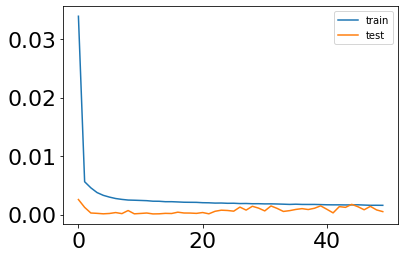

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(1))
ADAM = Adam(0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=ADAM)
history = model.fit(x_train,y_train,epochs=50,batch_size=72,validation_data=(x_test,y_test),verbose=1,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
def update_model(model, train, batch_size, updates):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	for i in range(updates):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()

In [52]:
predicted_stock_price = sc.inverse_transform(model.predict(x_test))

In [53]:
actual_stock_price = sc.inverse_transform(y_test.reshape((-1,1)))

No handles with labels found to put in legend.


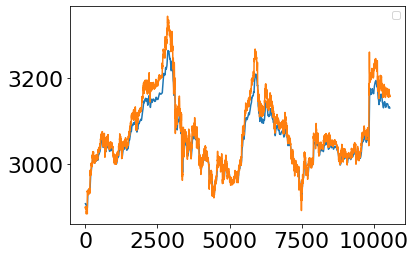

In [54]:
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)
plt.legend()
plt.show()

In [55]:
#computing profitability
answers = [INITIAL_BALANCE]

In [56]:
actions = []
portfolio_values = [INITIAL_BALANCE]
balance = INITIAL_BALANCE
for i in range(1,len(predicted_stock_price)):
    if predicted_stock_price[i]>actual_stock_price[i-1]:
        #go long
        balance += actual_stock_price[i]-actual_stock_price[i-1]
        actions.append(2)
    else:
        #go short
        balance += actual_stock_price[i-1]-actual_stock_price[i]
        actions.append(0)
    portfolio_values.append(float(balance))

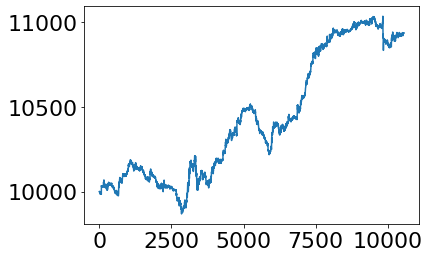

In [57]:
plt.plot(portfolio_values)

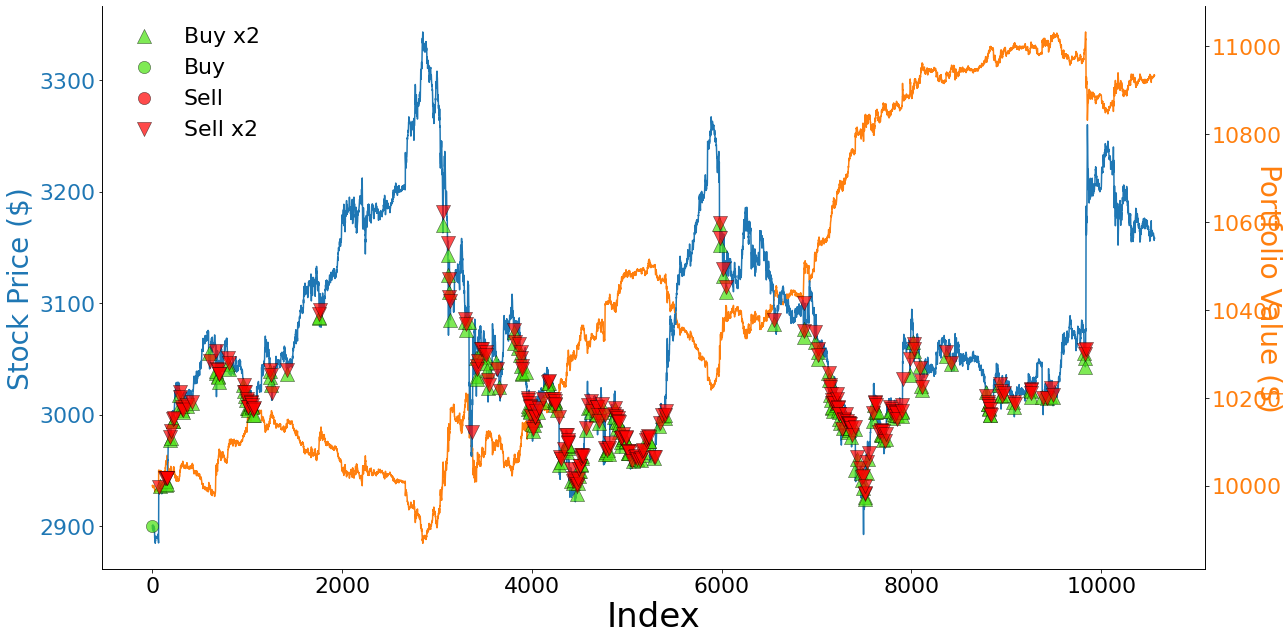

In [58]:
plot(prices=actual_stock_price,target_positions = actions,portfolio_values = portfolio_values)